# K-Nearest Neighbors (K-NN)

### Import the labraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("new_df.csv")
df.sample(10)

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
45,45,0,122,jaguar,std,four,sedan,rwd,front,113.0,...,8.1,176,4750.000000,15,19,35550.0,15.666667,Medium,0,1
127,127,2,122,renault,std,two,hatchback,fwd,front,96.1,...,8.7,104,5125.369458,23,31,9895.0,10.217391,Low,0,1
58,58,1,129,mazda,std,two,hatchback,fwd,front,98.8,...,8.6,84,4800.000000,26,32,10595.0,9.038462,Low,0,1
141,141,0,102,subaru,turbo,four,sedan,4wd,front,97.0,...,7.7,111,4800.000000,24,29,11259.0,9.791667,Low,0,1
172,172,-1,65,toyota,std,four,sedan,fwd,front,102.4,...,8.7,92,4200.000000,27,32,10898.0,8.703704,Low,0,1
93,93,1,122,nissan,std,four,sedan,fwd,front,94.5,...,9.4,69,5200.000000,31,37,7499.0,7.580645,Low,0,1
162,162,1,168,toyota,std,two,hatchback,rwd,front,94.5,...,9.4,112,6600.000000,26,29,9538.0,9.038462,Low,0,1
25,25,1,148,dodge,std,four,sedan,fwd,front,93.7,...,9.4,68,5500.000000,31,38,7609.0,7.580645,Low,0,1
200,200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,...,9.5,114,5400.000000,19,25,22625.0,12.368421,Low,0,1
66,66,0,93,mercedes-benz,turbo,two,hardtop,rwd,front,106.7,...,21.5,123,4350.000000,22,25,28176.0,10.681818,Medium,1,0


In [3]:
df.head(10)

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,13495.0,11.190476,Low,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,0,1
5,5,2,122,audi,std,two,sedan,fwd,front,99.8,...,8.5,110,5500.0,19,25,15250.0,12.368421,Low,0,1
6,6,1,158,audi,std,four,sedan,fwd,front,105.8,...,8.5,110,5500.0,19,25,17710.0,12.368421,Low,0,1
7,7,1,122,audi,std,four,wagon,fwd,front,105.8,...,8.5,110,5500.0,19,25,18920.0,12.368421,Low,0,1
8,8,1,158,audi,turbo,four,sedan,fwd,front,105.8,...,8.3,140,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,9,2,192,bmw,std,two,sedan,rwd,front,101.2,...,8.8,101,5800.0,23,29,16430.0,10.217391,Low,0,1


In [4]:
df.tail(10)

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
191,191,-1,74,volvo,std,four,wagon,rwd,front,104.3,...,9.5,114,5400.0,23,28,13415.0,10.217391,Low,0,1
192,192,-2,103,volvo,std,four,sedan,rwd,front,104.3,...,9.5,114,5400.0,24,28,15985.0,9.791667,Low,0,1
193,193,-1,74,volvo,std,four,wagon,rwd,front,104.3,...,9.5,114,5400.0,24,28,16515.0,9.791667,Low,0,1
194,194,-2,103,volvo,turbo,four,sedan,rwd,front,104.3,...,7.5,162,5100.0,17,22,18420.0,13.823529,Medium,0,1
195,195,-1,74,volvo,turbo,four,wagon,rwd,front,104.3,...,7.5,162,5100.0,17,22,18950.0,13.823529,Medium,0,1
196,196,-1,95,volvo,std,four,sedan,rwd,front,109.1,...,9.5,114,5400.0,23,28,16845.0,10.217391,Low,0,1
197,197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,...,8.7,160,5300.0,19,25,19045.0,12.368421,Medium,0,1
198,198,-1,95,volvo,std,four,sedan,rwd,front,109.1,...,8.8,134,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,...,23.0,106,4800.0,26,27,22470.0,9.038462,Low,1,0
200,200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,...,9.5,114,5400.0,19,25,22625.0,12.368421,Low,0,1


### Drop the Unnamed column

In [5]:
df.drop(df.columns[df.columns.str.contains("unname", case = False)], axis = 1, inplace = True)

In [6]:
df.head()
X = df.iloc[:,20:-8].values
y = df.iloc[:, -2].values

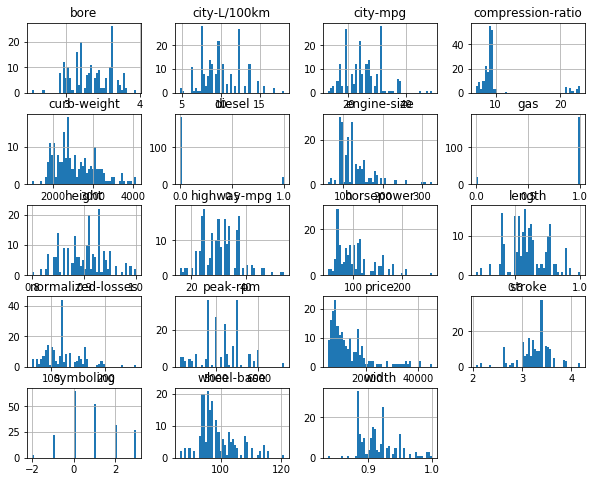

In [7]:
df.hist(bins = 50, figsize = (10, 8))
plt.show()

In [8]:
print(X)

[[111]
 [111]
 [154]
 [102]
 [115]
 [110]
 [110]
 [110]
 [140]
 [101]
 [101]
 [121]
 [121]
 [121]
 [182]
 [182]
 [182]
 [ 48]
 [ 70]
 [ 70]
 [ 68]
 [ 68]
 [102]
 [ 68]
 [ 68]
 [ 68]
 [102]
 [ 88]
 [145]
 [ 58]
 [ 76]
 [ 60]
 [ 76]
 [ 76]
 [ 76]
 [ 76]
 [ 86]
 [ 86]
 [ 86]
 [ 86]
 [101]
 [100]
 [ 78]
 [ 90]
 [176]
 [176]
 [262]
 [ 68]
 [ 68]
 [ 68]
 [ 68]
 [ 68]
 [101]
 [101]
 [101]
 [135]
 [ 84]
 [ 84]
 [ 84]
 [ 84]
 [ 64]
 [ 84]
 [120]
 [ 72]
 [123]
 [123]
 [123]
 [123]
 [155]
 [155]
 [184]
 [184]
 [175]
 [ 68]
 [ 68]
 [ 68]
 [102]
 [116]
 [ 88]
 [145]
 [145]
 [145]
 [ 88]
 [ 88]
 [116]
 [116]
 [ 69]
 [ 55]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 97]
 [ 97]
 [152]
 [152]
 [152]
 [160]
 [200]
 [160]
 [ 97]
 [ 95]
 [ 97]
 [ 95]
 [ 95]
 [ 95]
 [ 95]
 [ 95]
 [ 97]
 [ 95]
 [142]
 [ 68]
 [102]
 [ 68]
 [ 68]
 [ 68]
 [ 88]
 [145]
 [143]
 [207]
 [207]
 [207]
 [104]
 [104]
 [110]
 [110]
 [110]
 [110]
 [160]
 [160]
 [ 69]
 [ 73]
 [ 73]
 [ 82]
 [ 82]
 [ 94]
 [ 82]
 [111]
 [ 82]

In [9]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


**We want to see if horsepower of an Automobil will be a good prediction of diesel**

### Basic insight of the data set

In [10]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [12]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [13]:
df.index

RangeIndex(start=0, stop=201, step=1)

In [14]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.241064,-0.241064


## Handling missing_data

In [15]:
missing_data = df.isnull()
missing_data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Checking the missing_data point per column

In [16]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-system, dtype: int64

bore
False    201
Name: bore, dtype:

### Descriptive Statistic

In [17]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.000000,0.000000,1.000000,2.000000,3.000000
normalized-losses,201.0,122.000000,31.996250,65.000000,101.000000,122.000000,137.000000,256.000000
wheel-base,201.0,98.797015,6.066366,86.600000,94.500000,97.000000,102.400000,120.900000
length,201.0,0.837102,0.059213,0.678039,0.801538,0.832292,0.881788,1.000000
width,201.0,0.915126,0.029187,0.837500,0.890278,0.909722,0.925000,1.000000
height,201.0,0.899108,0.040933,0.799331,0.869565,0.904682,0.928094,1.000000
curb-weight,201.0,2555.666667,517.296727,1488.000000,2169.000000,2414.000000,2926.000000,4066.000000
engine-size,201.0,126.875622,41.546834,61.000000,98.000000,120.000000,141.000000,326.000000
bore,201.0,3.330692,0.268072,2.540000,3.150000,3.310000,3.580000,3.940000
stroke,201.0,3.256874,0.316048,2.070000,3.110000,3.290000,3.410000,4.170000


### Continuous Numerical Variable

**Let see if Horsepower, price, highwaymgp will be a good prediction of diesel**

**regression Plot**

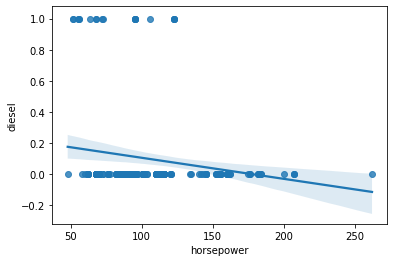

In [19]:
sns.regplot(x = "horsepower", y = "diesel", data = df)
plt.show()

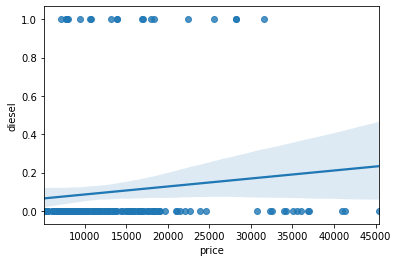

In [20]:
sns.regplot(x = "price", y = "diesel", data = df)

### Categorical Vriable

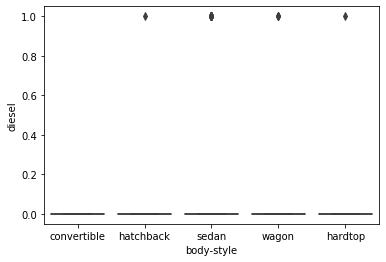

In [21]:
sns.boxplot(x = "body-style", y = "diesel", data = df)

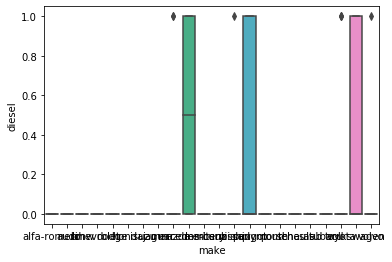

In [22]:
sns.boxplot(x = "make", y = "diesel", data = df)

In [23]:
value_count = df["horsepower-binned"].value_counts()
value_count[:3]

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

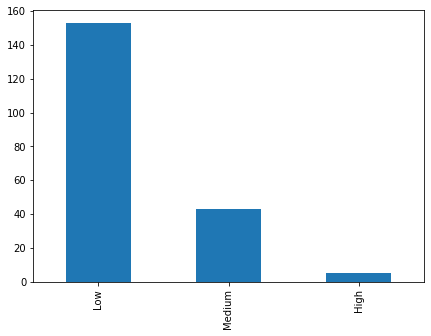

In [24]:
value_count[:3].plot(kind = "bar", figsize = (7,5))

## Split the dataset into Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [26]:
print(X_train)

[[207]
 [100]
 [ 97]
 [ 62]
 [ 68]
 [ 76]
 [ 70]
 [101]
 [ 84]
 [110]
 [ 97]
 [ 85]
 [ 70]
 [ 70]
 [ 69]
 [101]
 [116]
 [ 68]
 [ 69]
 [ 94]
 [ 69]
 [ 82]
 [160]
 [ 82]
 [ 69]
 [ 95]
 [182]
 [ 88]
 [111]
 [110]
 [262]
 [ 82]
 [114]
 [ 95]
 [120]
 [154]
 [ 84]
 [ 73]
 [134]
 [ 90]
 [101]
 [162]
 [ 68]
 [160]
 [ 52]
 [161]
 [104]
 [ 69]
 [ 97]
 [ 70]
 [114]
 [ 68]
 [111]
 [ 69]
 [ 95]
 [ 69]
 [123]
 [116]
 [100]
 [155]
 [ 68]
 [ 68]
 [116]
 [121]
 [112]
 [ 68]
 [ 90]
 [ 73]
 [ 68]
 [182]
 [ 88]
 [ 97]
 [101]
 [152]
 [102]
 [102]
 [102]
 [116]
 [106]
 [110]
 [155]
 [116]
 [145]
 [ 56]
 [ 92]
 [ 70]
 [ 69]
 [114]
 [121]
 [ 68]
 [200]
 [ 76]
 [ 84]
 [123]
 [111]
 [ 88]
 [112]
 [ 78]
 [ 95]
 [160]
 [ 92]
 [ 48]
 [ 86]
 [160]
 [101]
 [ 70]
 [110]
 [ 76]
 [145]
 [142]
 [ 62]
 [ 60]
 [116]
 [104]
 [156]
 [ 76]
 [ 82]
 [ 92]
 [ 62]
 [ 58]
 [152]
 [ 88]
 [145]
 [ 68]
 [ 62]
 [114]
 [175]
 [116]
 [ 68]
 [116]
 [145]
 [ 68]
 [161]
 [114]
 [ 86]
 [ 84]
 [ 82]
 [ 69]
 [184]
 [ 55]
 [ 86]
 [ 68]
 [101]

In [27]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0]


In [28]:
print(X_test)

[[ 70]
 [ 73]
 [ 95]
 [152]
 [156]
 [ 85]
 [110]
 [ 62]
 [121]
 [ 70]
 [ 84]
 [207]
 [ 52]
 [ 56]
 [145]
 [110]
 [ 76]
 [110]
 [ 86]
 [ 68]
 [ 68]
 [111]
 [176]
 [ 70]
 [ 64]
 [207]
 [ 85]
 [ 90]
 [143]
 [176]
 [182]
 [135]
 [ 62]
 [ 95]
 [102]
 [ 88]
 [110]
 [115]
 [ 88]
 [ 97]
 [ 69]
 [123]
 [102]
 [ 95]
 [116]
 [ 72]
 [140]
 [ 68]
 [ 68]
 [ 94]
 [184]]


In [29]:
print(y_test)

[0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0]


## Features Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
print(X_train)

[[ 2.87102583]
 [-0.073569  ]
 [-0.15612774]
 [-1.11931296]
 [-0.9541955 ]
 [-0.73403887]
 [-0.89915634]
 [-0.04604943]
 [-0.51388225]
 [ 0.20162677]
 [-0.15612774]
 [-0.48636267]
 [-0.89915634]
 [-0.89915634]
 [-0.92667592]
 [-0.04604943]
 [ 0.36674424]
 [-0.9541955 ]
 [-0.92667592]
 [-0.23868647]
 [-0.92667592]
 [-0.56892141]
 [ 1.57760567]
 [-0.56892141]
 [-0.92667592]
 [-0.21116689]
 [ 2.18303638]
 [-0.40380394]
 [ 0.22914635]
 [ 0.20162677]
 [ 4.38460261]
 [-0.56892141]
 [ 0.31170509]
 [-0.21116689]
 [ 0.47682255]
 [ 1.4124882 ]
 [-0.51388225]
 [-0.81659761]
 [ 0.86209664]
 [-0.34876478]
 [-0.04604943]
 [ 1.63264482]
 [-0.9541955 ]
 [ 1.57760567]
 [-1.39450874]
 [ 1.60512524]
 [ 0.03650931]
 [-0.92667592]
 [-0.15612774]
 [-0.89915634]
 [ 0.31170509]
 [-0.9541955 ]
 [ 0.22914635]
 [-0.92667592]
 [-0.21116689]
 [-0.92667592]
 [ 0.55938129]
 [ 0.36674424]
 [-0.073569  ]
 [ 1.44000778]
 [-0.9541955 ]
 [-0.9541955 ]
 [ 0.36674424]
 [ 0.50434213]
 [ 0.25666593]
 [-0.9541955 ]
 [-0.34876

In [32]:
print(X_test)

[[-0.89915634]
 [-0.81659761]
 [-0.21116689]
 [ 1.35744904]
 [ 1.46752736]
 [-0.48636267]
 [ 0.20162677]
 [-1.11931296]
 [ 0.50434213]
 [-0.89915634]
 [-0.51388225]
 [ 2.87102583]
 [-1.39450874]
 [-1.28443043]
 [ 1.164812  ]
 [ 0.20162677]
 [-0.73403887]
 [ 0.20162677]
 [-0.45884309]
 [-0.9541955 ]
 [-0.9541955 ]
 [ 0.22914635]
 [ 2.01791891]
 [-0.89915634]
 [-1.06427381]
 [ 2.87102583]
 [-0.48636267]
 [-0.34876478]
 [ 1.10977284]
 [ 2.01791891]
 [ 2.18303638]
 [ 0.88961622]
 [-1.11931296]
 [-0.21116689]
 [-0.01852985]
 [-0.40380394]
 [ 0.20162677]
 [ 0.33922466]
 [-0.40380394]
 [-0.15612774]
 [-0.92667592]
 [ 0.55938129]
 [-0.01852985]
 [-0.21116689]
 [ 0.36674424]
 [-0.84411718]
 [ 1.02721411]
 [-0.9541955 ]
 [-0.9541955 ]
 [-0.23868647]
 [ 2.23807554]]


### Train the K-Nearest Neighbors (K-NN)  on the Training set

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predicting a new Results

In [34]:
print(classifier.predict(sc.transform([[70]])))

[0]


### Predicting the Test Results

In [35]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))    

[[0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[41  0]
 [ 7  3]]


0.8627450980392157

### Check the Classification Reports

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        41
           1       1.00      0.30      0.46        10

    accuracy                           0.86        51
   macro avg       0.93      0.65      0.69        51
weighted avg       0.88      0.86      0.83        51



### Visualising the Training set results

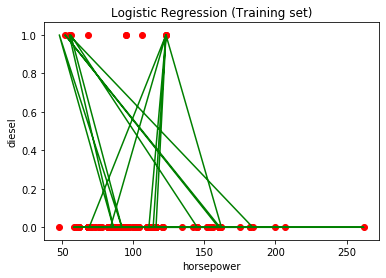

In [38]:
from matplotlib.colors import ListedColormap
plt.scatter(sc.inverse_transform(X_train), y_train, color = "red")
plt.plot(sc.inverse_transform(X_train), classifier.predict(X_train), color = "green")

plt.title('Logistic Regression (Training set)')
plt.xlabel('horsepower')
plt.ylabel('diesel')
plt.show()

### Visualising the Test set Results

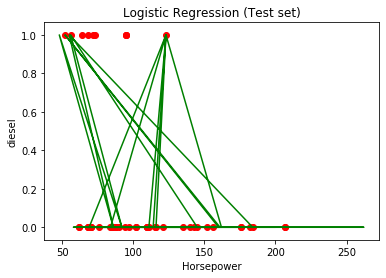

In [39]:
from matplotlib.colors import ListedColormap
plt.scatter(sc.inverse_transform(X_test), y_test, color = "red")
plt.plot(sc.inverse_transform(X_train), classifier.predict(X_train), color = "green")

plt.title('Logistic Regression (Test set)')
plt.xlabel('Horsepower')
plt.ylabel('diesel')
plt.show()